**Traditional ML Approach By Using Naive Bayes Classifier**



*   Naive Bayes handles both categorical target variable as well as Numerical target variable
*   I have followed both approaches:In first approach I have not converted target variable into numerical variable.In the second approach, I have used label encoding to convert target variable into numerical variable.


*   I have performed both approach to show that there is no any difference in the performance if we follow both approach.






In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Text processing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

**Approach I : By taking target variable as it is**

In [ ]:
def get_EDA():
  #Function to perform EDA on the dataset
  # Load the dataset
  df = pd.read_excel('/content/topical_chat.csv.xlsx')

  # Check for missing values
  print("<<<<Missing values>>>>:\n", df.isnull().sum())

  # Drop rows with missing values in the 'message' column as we have only 5 records missing
  df = df.dropna(subset=['message'])

  # Explore distribution of sentiments
  sns.countplot(x='sentiment', data=df)
  plt.title('Distribution of Sentiments')
  plt.show()
  # Calculate percentage distribution of sentiments
  sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100

  # Display the percentage distribution
  print("<<<<Percentage Distribution of Sentiments>>>>")
  print(sentiment_distribution)
  return df

In [ ]:
def get_text_cleaned(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stop words and apply lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

In [ ]:
def process_dataframe(df):
    # Apply text cleaning to 'message' column
    df=get_EDA()
    df['message'] = df['message'].astype(str)
    df['processed_message'] = df['message'].apply(get_text_cleaned)
    return df

In [ ]:
def get_model_creation_evaluation(df):
  #Function for model creation and Evaluation
  # Split the data into training and testing sets
  df=get_EDA()
  df=process_dataframe(df)
  train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
  # Vectorize the processed text data using TF-IDF
  vectorizer = TfidfVectorizer(max_features=5000)
  X_train = vectorizer.fit_transform(train_data['processed_message'])
  X_test = vectorizer.transform(test_data['processed_message'])
  # Split the data into features (X) and target (y)
  X = df['processed_message']
  y = df['sentiment']

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Vectorize the processed text data using TF-IDF
  vectorizer = TfidfVectorizer(max_features=5000)
  X_train_vec = vectorizer.fit_transform(X_train)
  X_test_vec = vectorizer.transform(X_test)
  # Train a Naive Bayes classifier
  classifier = MultinomialNB()
  classifier.fit(X_train_vec, y_train)

  # Make predictions on the test set
  predictions = classifier.predict(X_test_vec)
  # Evaluate the model
  print("\nClassification Report:\n", classification_report(y_test, predictions))
  print("Accuracy:", accuracy_score(y_test, predictions))
  # Confusion Matrix
  conf_mat = confusion_matrix(y_test, predictions)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()


**Approach II : Converting Target variable into numerical by using Label encoding**

In [ ]:
def get_model_creation_label_encoding(df):
  # Function to creat model by following approach II
  # Encode the sentiment column using LabelEncoder
  label_encoder = LabelEncoder()
  df=get_EDA()
  df=process_dataframe(df)
  df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])

  # Split the data into features (X) and target (y)
  X = df['processed_message']
  y = df['encoded_sentiment']

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Vectorize the processed text data using TF-IDF
  vectorizer = TfidfVectorizer(max_features=5000)
  X_train_vec = vectorizer.fit_transform(X_train)
  X_test_vec = vectorizer.transform(X_test)
  # Train a Naive Bayes classifier
  classifier = MultinomialNB()
  classifier.fit(X_train_vec, y_train)

  # Make predictions on the test set
  predictions = classifier.predict(X_test_vec)

  # Evaluate the model
  print("\nClassification Report:\n", classification_report(y_test, predictions, target_names=label_encoder.classes_))
  print("Accuracy:", accuracy_score(y_test, predictions))

  # Confusion Matrix
  conf_mat = confusion_matrix(y_test, predictions)

<<<<Start of EDA>>>>
<<<<Missing values>>>>:
 conversation_id    0
message            5
sentiment          0
dtype: int64


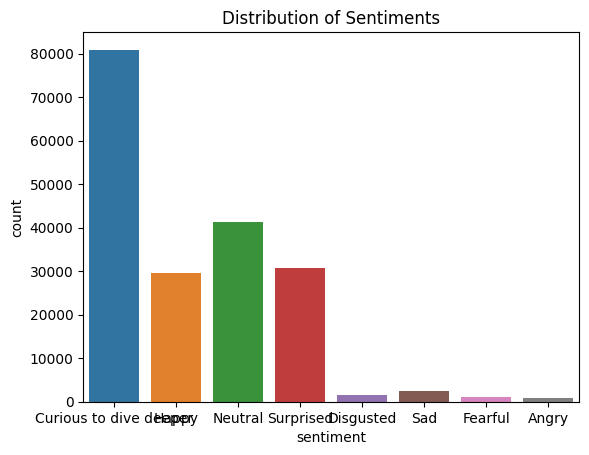

<<<<Percentage Distribution of Sentiments>>>>
Curious to dive deeper    42.939806
Neutral                   21.960154
Surprised                 16.264008
Happy                     15.721468
Sad                        1.344673
Disgusted                  0.760194
Fearful                    0.544664
Angry                      0.465035
Name: sentiment, dtype: float64
<<<<Start of Data Clearning>>>>
<<<<Missing values>>>>:
 conversation_id    0
message            5
sentiment          0
dtype: int64


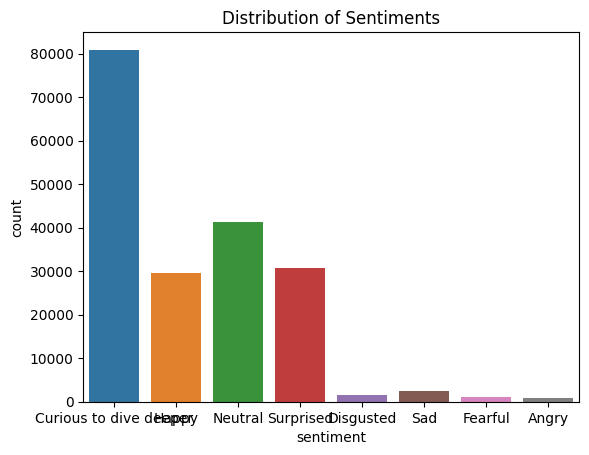

<<<<Percentage Distribution of Sentiments>>>>
Curious to dive deeper    42.939806
Neutral                   21.960154
Surprised                 16.264008
Happy                     15.721468
Sad                        1.344673
Disgusted                  0.760194
Fearful                    0.544664
Angry                      0.465035
Name: sentiment, dtype: float64
<<<<Start of Approach I >>>>
<<<<Start of Model Creation>>>>
<<<<Missing values>>>>:
 conversation_id    0
message            5
sentiment          0
dtype: int64


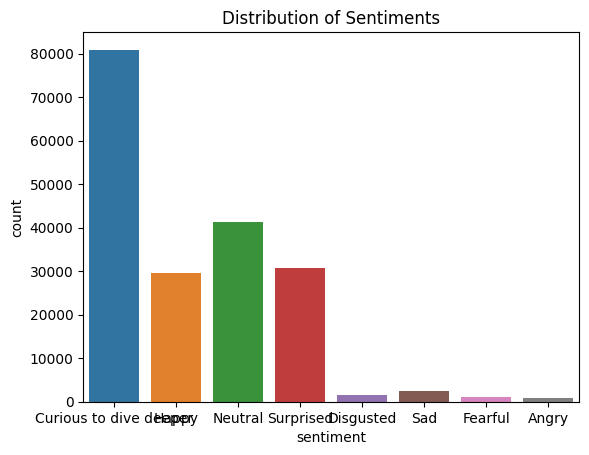

<<<<Percentage Distribution of Sentiments>>>>
Curious to dive deeper    42.939806
Neutral                   21.960154
Surprised                 16.264008
Happy                     15.721468
Sad                        1.344673
Disgusted                  0.760194
Fearful                    0.544664
Angry                      0.465035
Name: sentiment, dtype: float64
<<<<Missing values>>>>:
 conversation_id    0
message            5
sentiment          0
dtype: int64


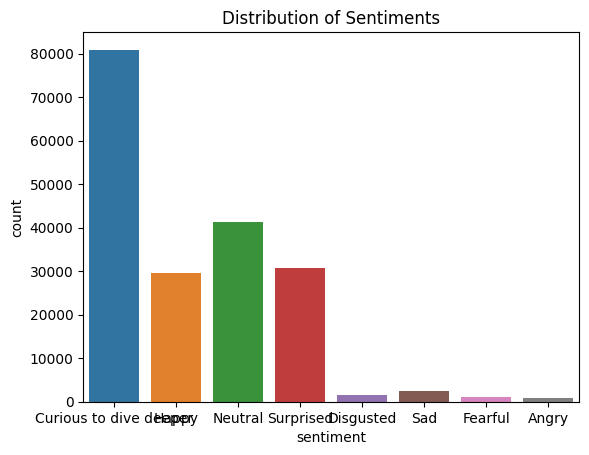

<<<<Percentage Distribution of Sentiments>>>>
Curious to dive deeper    42.939806
Neutral                   21.960154
Surprised                 16.264008
Happy                     15.721468
Sad                        1.344673
Disgusted                  0.760194
Fearful                    0.544664
Angry                      0.465035
Name: sentiment, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
                         precision    recall  f1-score   support

                 Angry       0.00      0.00      0.00       154
Curious to dive deeper       0.45      0.93      0.61     16097
             Disgusted       0.00      0.00      0.00       302
               Fearful       0.00      0.00      0.00       207
                 Happy       0.47      0.09      0.15      5942
               Neutral       0.44      0.12      0.19      8294
                   Sad       0.33      0.01      0.01       522
             Surprised       0.42      0.07      0.12      6157

              accuracy                           0.45     37675
             macro avg       0.26      0.15      0.14     37675
          weighted avg       0.44      0.45      0.35     37675

Accuracy: 0.4509621765096218


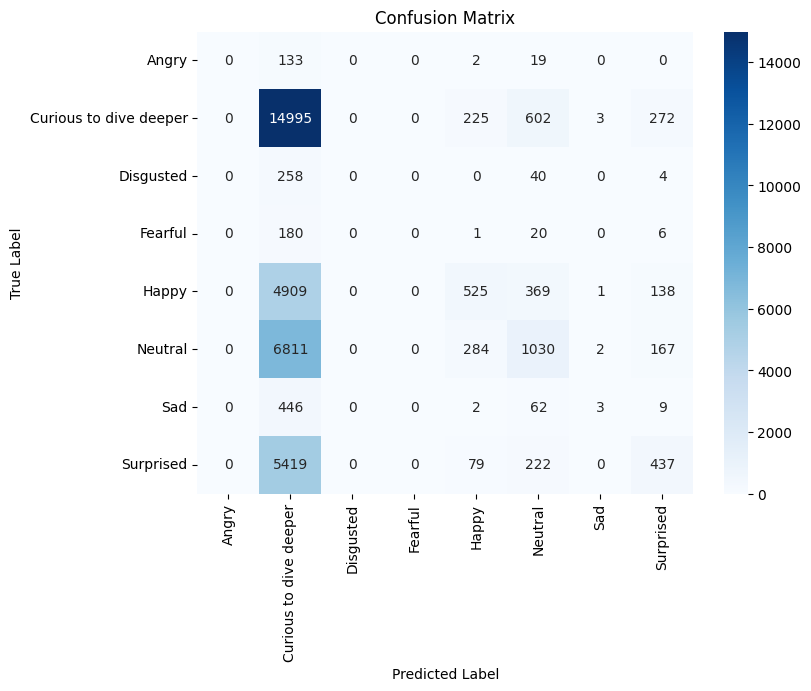

<<<<End of Approach I >>>>
<<<<Start of Approach II >>>>
<<<<Missing values>>>>:
 conversation_id    0
message            5
sentiment          0
dtype: int64


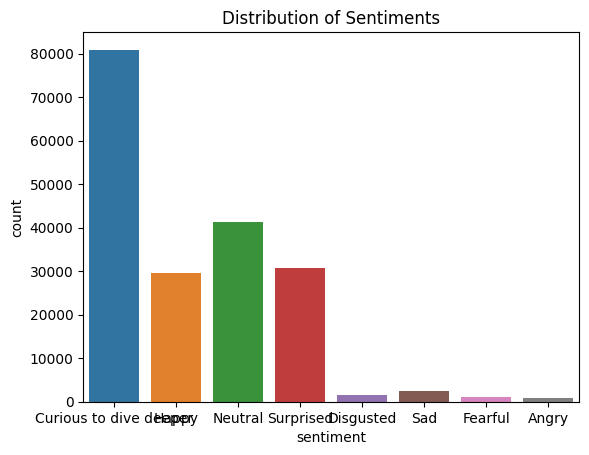

<<<<Percentage Distribution of Sentiments>>>>
Curious to dive deeper    42.939806
Neutral                   21.960154
Surprised                 16.264008
Happy                     15.721468
Sad                        1.344673
Disgusted                  0.760194
Fearful                    0.544664
Angry                      0.465035
Name: sentiment, dtype: float64
<<<<Missing values>>>>:
 conversation_id    0
message            5
sentiment          0
dtype: int64


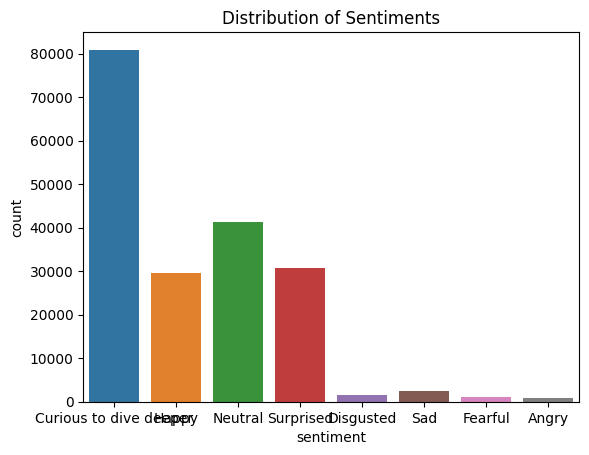

<<<<Percentage Distribution of Sentiments>>>>
Curious to dive deeper    42.939806
Neutral                   21.960154
Surprised                 16.264008
Happy                     15.721468
Sad                        1.344673
Disgusted                  0.760194
Fearful                    0.544664
Angry                      0.465035
Name: sentiment, dtype: float64

Classification Report:
                         precision    recall  f1-score   support

                 Angry       0.00      0.00      0.00       154
Curious to dive deeper       0.45      0.93      0.61     16097
             Disgusted       0.00      0.00      0.00       302
               Fearful       0.00      0.00      0.00       207
                 Happy       0.47      0.09      0.15      5942
               Neutral       0.44      0.12      0.19      8294
                   Sad       0.33      0.01      0.01       522
             Surprised       0.42      0.07      0.12      6157

              accuracy         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
if __name__ == "__main__":
  print("<<<<Start of EDA>>>>")
  df=get_EDA()
  print("<<<<Start of Data Clearning>>>>")
  df=process_dataframe(df)
  print("<<<<Start of Approach I >>>>")
  print("<<<<Start of Model Creation>>>>")
  get_model_creation_evaluation(df)
  print("<<<<End of Approach I >>>>")
  print("<<<<Start of Approach II >>>>")
  get_model_creation_label_encoding(df)
  print("<<<<End of Approach II >>>>")


**As data is imbalance so we are going to use class_weight technique to handle imablace class,we are going to use Rnadomforest Classifier alogirithm**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
dataset_path = "/content/topical_chat.csv.xlsx"
topical_chat_data = pd.read_excel(dataset_path)
topical_chat_data['message']=topical_chat_data['message'].astype(str)

In [ ]:
topical_chat_data.head(2)

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpful...,Curious to dive deeper


In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(topical_chat_data, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and a machine learning classifier
model = make_pipeline(
    TfidfVectorizer(max_features=5000),
    RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")  # Handling class imbalance with class_weight
)

In [ ]:
# Train the model
model.fit(train_data['message'], train_data['sentiment'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=5000)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
# Predict on the test set
predictions = model.predict(test_data['message'])

# Evaluate the model
print(classification_report(test_data['sentiment'], predictions))
print(confusion_matrix(test_data['sentiment'], predictions))

                        precision    recall  f1-score   support

                 Angry       0.00      0.00      0.00       162
Curious to dive deeper       0.48      0.90      0.63     16204
             Disgusted       0.00      0.00      0.00       283
               Fearful       0.07      0.01      0.02       218
                 Happy       0.52      0.14      0.22      5946
               Neutral       0.46      0.22      0.30      8170
                   Sad       0.34      0.06      0.10       522
             Surprised       0.49      0.15      0.23      6171

              accuracy                           0.48     37676
             macro avg       0.30      0.18      0.19     37676
          weighted avg       0.48      0.48      0.41     37676

[[    0   129     0     0     2    25     0     6]
 [    1 14549     3     4   322   859    20   446]
 [    0   225     0     0     0    47     4     7]
 [    0   183     0     2     2    25     1     5]
 [    1  4211     2    11

**As our traditional ML algorithms are not performig well when there are very less samples, we are going to try Deep learning Techniques**